In [88]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/klno/diamond --filename=out.log --output=../data/diamond-klno.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/k-sos-mp2/diamond --filename=out.log --output=../data/diamond-k-sos-mp2.json

In [91]:
import json, numpy
from matplotlib import pyplot as plt

data = {}

d1 = None
with open('../data/diamond-k-sos-mp2.json', 'r') as f:
    d1 = json.load(f)
d1 = {"/".join(k.split("/")[-2:]): v for k, v in d1.items()}

d2 = None
with open('../data/diamond-ref-kpts.json', 'r') as f:
    d2 = json.load(f)
d2 = {"/".join(k.split("/")[-2:]): v for k, v in d2.items()}

for k1 in sorted([k for k, v in d1.items()]):
    v1 = d1[k1]
    kmesh = k1.split("/")[-2]

    ene_krhf = v1['ene_krhf']
    ene_krhf_ref = numpy.nan
    ene_os_ref = numpy.nan
    ene_mp2_ref = numpy.nan
    ene_corr_mp2_ref = numpy.nan

    if k1 in d2:
        k2 = k1
        v2 = d2[k2]

        ene_krhf_ref = v2['ene_krhf']
        ene_os_ref = v2['ene_corr_os']
        ene_mp2_ref = v2['ene_kmp2']
        ene_corr_mp2_ref = v2['ene_corr_kmp2']
        assert abs(ene_corr_mp2_ref + ene_krhf_ref - ene_mp2_ref) < 1e-6
    
    out = ""
    ee = []
    for kk, vv in v1.items():
        if "ene_os" in kk:
            ee.append(vv)
            err = vv - ene_os_ref
            out += "%s/%s ene_os = % 12.8f, err = % 6.2e\n" % (k1, kk, vv, err)

    if len(ee) < 3:
        continue

    ene_os_sol = ee[2]
    err = ene_os_sol - ene_os_ref
    out += "%s %s = % 12.8f, err = % 6.2e\n" % (k1[:-1], "ene_os", ene_os_sol, err)
    # print(out)

    if "fftisdf-60-14" in k1:
        print(k1)
        data[kmesh] = {
            "ene_os": ene_os_sol,
            "ene_krhf": ene_krhf,
            "ene_kmp2": ene_mp2_ref,
            "ene_corr_mp2": ene_corr_mp2_ref,
        }

print(len(data))

1-1-2/fftisdf-60-14
1-2-2/fftisdf-60-14
2-2-2/fftisdf-60-14
2-2-3/fftisdf-60-14
2-3-3/fftisdf-60-14
3-3-3/fftisdf-60-14
3-3-4/fftisdf-60-14
3-4-4/fftisdf-60-14
4-4-4/fftisdf-60-14
4-4-5/fftisdf-60-14
4-5-5/fftisdf-60-14
5-5-5/fftisdf-60-14
5-5-6/fftisdf-60-14
5-6-6/fftisdf-60-14
6-6-6/fftisdf-60-14
6-6-7/fftisdf-60-14
6-7-7/fftisdf-60-14
7-7-7/fftisdf-60-14
7-7-8/fftisdf-60-14
7-8-8/fftisdf-60-14
8-8-10/fftisdf-60-14
8-8-8/fftisdf-60-14
22


nk =   2, ene_krhf = -10.57682410, ene_mp2 = -10.79444797, ene_ccsd = -10.82239475
nk =   4, ene_krhf = -10.82926354, ene_mp2 = -11.05737409, ene_ccsd = -11.07757830
nk =   8, ene_krhf = -10.95722433, ene_mp2 = -11.18984248, ene_ccsd = -11.20866367
nk =  18, ene_krhf = -11.02151491, ene_mp2 = -11.27117904, ene_ccsd = -11.28352051
nk =  27, ene_krhf = -11.02227872, ene_mp2 = -11.27435564, ene_ccsd = -11.28617184
nk =  36, ene_krhf = -11.02794901, ene_mp2 = -11.28490444, ene_ccsd = -11.29482566
nk =  48, ene_krhf = -11.03012751, ene_mp2 = -11.28989990, ene_ccsd = -11.29878902
nk =  64, ene_krhf = -11.02874276, ene_mp2 = -11.28943564, ene_ccsd = -11.29807703
nk = 100, ene_krhf = -11.02918477, ene_mp2 = -11.29291282, ene_ccsd = -11.30062989
nk = 125, ene_krhf = -11.02832098, ene_mp2 = -11.29245991, ene_ccsd = -11.30007734
nk = 150, ene_krhf = -11.02814471, ene_mp2 = -11.29305826, ene_ccsd = -11.30045866
nk = 180, ene_krhf = -11.02783412, ene_mp2 = -11.29321813, ene_ccsd = -11.30048458
nk =

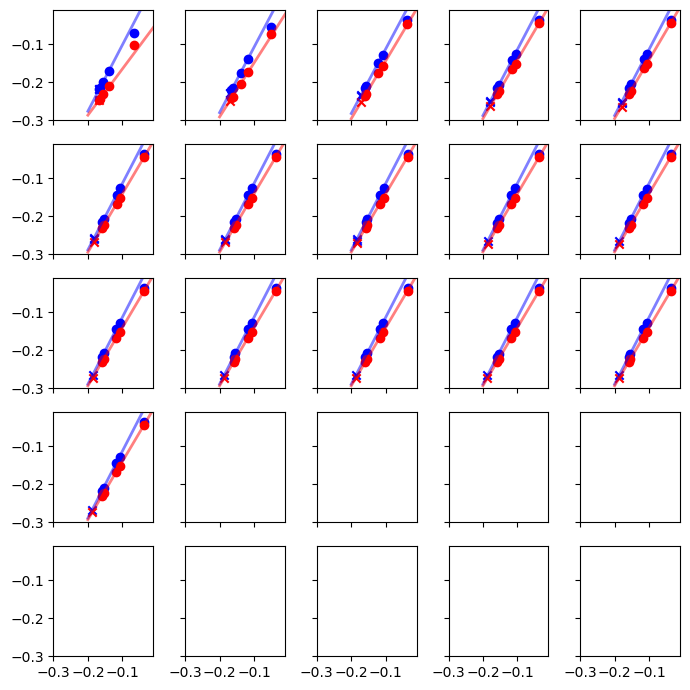

In [98]:
d = None
with open('../data/diamond-klno.json', 'r') as f:
    d = json.load(f)

nx = 5
ny = 5
fig, axs = plt.subplots(nx, ny, figsize=(7, 7), sharex=True, sharey=True)

l = ["1-1-2", "1-2-2", "2-2-2", "2-3-3", "3-3-3"]
l += ["3-3-4", "3-4-4", "4-4-4", "4-5-5", "5-5-5"]
l += ["5-5-6", "5-6-6", "6-6-6", "6-7-7", "7-7-7"]
l += ["7-7-8"] # , "7-8-8"] # , "8-8-8"]


np = 1
# for ik, k1 in enumerate(sorted([k for k, v in data.items()])):

for ik, k1 in enumerate(l):
    v1 = data[k1]
    kk = [k for k, v in d.items() if k1 + "/fftisdf-60-14" in k]
    
    xx = [d[k]['ene_klno_corr_os']   for k in kk if 'ene_klno_corr_os' in d[k]]
    yy = [d[k]['ene_klno_corr_mp2']  for k in kk if 'ene_klno_corr_os' in d[k]]
    zz = [d[k]['ene_klno_corr_ccsd'] for k in kk if 'ene_klno_corr_os' in d[k]]

    assert len(xx) == len(yy) == len(zz)

    xx = numpy.array(xx)
    yy = numpy.array(yy)
    zz = numpy.array(zz)

    
    ax = axs[ik // ny, ik % nx]

    # fit xx and yy
    x = numpy.array(xx)
    y = numpy.array(yy)
    ix = numpy.argsort(x)
    x = x[ix][:-2]
    y = y[ix][:-2]

    r = numpy.polyfit(x, y, np)
    poly = numpy.poly1d(r)

    ax.scatter(xx, yy, label='MP2', color='blue')

    z = numpy.linspace(-0.2, 0.0, 100)
    ax.plot(z, poly(z), color='blue', label='MP2 fit', linewidth=2, alpha=0.5)
    ene_mp2_sol = poly(v1['ene_os'])
    ene_mp2_ref = v1['ene_corr_mp2']
    
    err = ene_mp2_sol - ene_mp2_ref
    ax.scatter(v1['ene_os'], ene_mp2_sol, label='MP2', color='blue', marker='x')
    ax.scatter(v1['ene_os'], ene_mp2_ref, label='MP2 ref', color='blue', marker='x')

    x = numpy.array(xx)
    y = numpy.array(zz)
    ix = numpy.argsort(x)
    x = x[ix][:-2]
    y = y[ix][:-2]

    r = numpy.polyfit(x, y, np)
    poly = numpy.poly1d(r)

    ax.scatter(xx, zz, label='CCSD', color='red')
    ax.plot(z, poly(z), color='red', label='CCSD fit', linewidth=2, alpha=0.5)
    ene_ccsd_sol = poly(v1['ene_os'])
    ax.scatter(v1['ene_os'], ene_ccsd_sol, label='CCSD', color='red', marker='x')

    ax.set_xlim(-0.3, -0.01)
    ax.set_ylim(-0.3, -0.01)

    nk = numpy.prod(numpy.array([int(k) for k in k1.split("-")]))
    
    ene_krhf_tot = data[k1]['ene_krhf']
    ene_kmp2_tot_ref = data[k1]['ene_kmp2']
    ene_kmp2_tot_sol = ene_krhf_tot + ene_mp2_sol
    ene_ccsd_tot = ene_krhf_tot + ene_ccsd_sol
    
    out = "nk = %3d, ene_krhf = % 12.8f, ene_mp2 = % 12.8f, " % (nk, ene_krhf_tot, ene_kmp2_tot_sol)
    out += "ene_ccsd = % 12.8f" % (ene_ccsd_tot)
    print(out)

fig.tight_layout()

[-0.19922269 -5.51277248] [392 343 294 216 180 150] [-5.51326405 -5.5133522  -5.51346143 -5.51369175 -5.51391706 -5.51407235]
[-0.02283185 -5.64641109] [-5.64646022 -5.64646124 -5.64652403 -5.64647006 -5.64660906 -5.64652913]
[-0.06847812 -5.64980088] [-5.6499683  -5.64998625 -5.65006535 -5.65007505 -5.65024225 -5.6502293 ]


(0.0, 0.02)

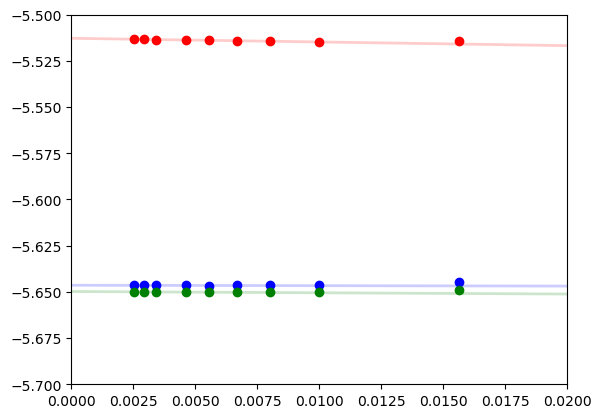

In [156]:
data = """
nk =   2, ene_krhf = -10.57682410, ene_mp2 = -10.79444797, ene_ccsd = -10.82239475
nk =   4, ene_krhf = -10.82926354, ene_mp2 = -11.05737409, ene_ccsd = -11.07757830
nk =   8, ene_krhf = -10.95722433, ene_mp2 = -11.18984248, ene_ccsd = -11.20866367
nk =  18, ene_krhf = -11.02151491, ene_mp2 = -11.27117904, ene_ccsd = -11.28352051
nk =  27, ene_krhf = -11.02227872, ene_mp2 = -11.27435564, ene_ccsd = -11.28617184
nk =  36, ene_krhf = -11.02794901, ene_mp2 = -11.28490444, ene_ccsd = -11.29482566
nk =  48, ene_krhf = -11.03012751, ene_mp2 = -11.28989990, ene_ccsd = -11.29878902
nk =  64, ene_krhf = -11.02874276, ene_mp2 = -11.28943564, ene_ccsd = -11.29807703
nk = 100, ene_krhf = -11.02918477, ene_mp2 = -11.29291282, ene_ccsd = -11.30062989
nk = 125, ene_krhf = -11.02832098, ene_mp2 = -11.29245991, ene_ccsd = -11.30007734
nk = 150, ene_krhf = -11.02814471, ene_mp2 = -11.29305826, ene_ccsd = -11.30045866
nk = 180, ene_krhf = -11.02783412, ene_mp2 = -11.29321813, ene_ccsd = -11.30048458
nk = 216, ene_krhf = -11.02738350, ene_mp2 = -11.29294013, ene_ccsd = -11.30015017
nk = 294, ene_krhf = -11.02692286, ene_mp2 = -11.29304807, ene_ccsd = -11.30013073
nk = 343, ene_krhf = -11.02670439, ene_mp2 = -11.29292248, ene_ccsd = -11.29997256
nk = 392, ene_krhf = -11.02652810, ene_mp2 = -11.29292043, ene_ccsd = -11.29993668
"""

data = data.split("\n")
data = [d.split() for d in data if len(d) > 1]
nk = [int(d[2][:-1]) for d in data]
ene_krhf = [float(d[5][:-1]) / 2 for d in data]
ene_mp2 = [float(d[8][:-1]) / 2 for d in data]
ene_ccsd = [float(d[11][:-1]) / 2 for d in data]

ix = [-1, -2, -3, -4, -5, -6]
z = numpy.linspace(0, 1.0, 100)
nk = numpy.array(nk)
x = 1 / nk
y = numpy.array(ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
print(r, nk[ix], y[ix])
poly = numpy.poly1d(r)


fig, ax = plt.subplots()
ax.plot(z, poly(z), color='red', label='HF fit', linewidth=2, alpha=0.2)
ax.scatter(x, y, label='HF', color='red')

y = numpy.array(ene_mp2)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
print(r, y[ix])
ax.plot(z, poly(z), color='blue', label='MP2 fit', linewidth=2, alpha=0.2)
ax.scatter(x, y, label='MP2', color='blue')

y = numpy.array(ene_ccsd)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
print(r, y[ix])
ax.plot(z, poly(z), color='green', label='CCSD fit', linewidth=2, alpha=0.2)
ax.scatter(x, y, label='CCSD', color='green')


ax.set_ylim(-5.7, -5.5)
ax.set_xlim(0.0, 0.02)
